# Plotting the weather data

**Through this assignment I learned to use mplleaflet and created a line plot showing temperature trends between 2005-2014 in Ann Arbor, Michigan and how 2015 lowest and highest recorded temperatures compare with the ten years trend.**


The dataset has been stored in the file 'WeatherAnnArbor.csv".<br>
The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [7]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('bins/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

c:\users\cesur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
c:\users\cesur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)



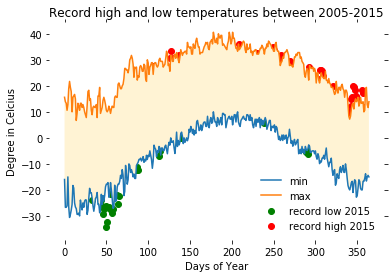

In [8]:
def max_min_plot():
    df=pd.read_csv('WeatherAnnArbor.csv')
    df['Date']=pd.to_datetime(df['Date'])
    df['month']=df['Date'].dt.month
    df['day']=df['Date'].dt.day
    #removing 29th of february in leap years
    df['leapday'] = (df['Date'].dt.month.eq(2) & df['Date'].dt.day.eq(29))
    df=df[df.leapday!= True]
    df=df.drop('leapday',axis=1)
    #getting celcius values
    df['Data_Value']=df['Data_Value']/10
    #creating a new dataset by removing 2015
    df_ne=df[df.Date.dt.year.ne(2015)]
    df_new=df_ne.groupby(['month','day'])['Data_Value'].agg({'min': np.min, 'max':np.max})
    a = np.arange(0,365,1)
    pd.Series(pd.to_datetime(a,unit='D')).dt.month
    #Plotting line plots
    plt.figure()
    plt.plot(a,df_new['min'],a,df_new['max'])
    #Setting axis and removing grids etc.
    ax=plt.gca()
    ax.set_xlabel('Days of Year')
    ax.set_ylabel('Degree in Celcius')
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
    #Data for scatter plot of highest and lowest days
    df_s=df[df.Date.dt.year.eq(2015)]
    df_s=df_s.groupby(['month','day'])['Data_Value'].agg({'min': np.min, 'max':np.max})
    df_s['minall']=df_new['min']
    df_s['maxall']=df_new['max']
    df_s['recordlow']=np.where(df_s['min']<df_s['minall'],df_s['min'],None)
    df_s['recordhigh']=np.where(df_s['max']>df_s['maxall'],df_s['max'],None)
    plt.scatter(a,df_s['recordlow'],c='green')
    plt.scatter(a,df_s['recordhigh'],c='red')
    plt.title('Record high and low temperatures between 2005-2015')
    plt.legend(['min','max','record low 2015','record high 2015'],loc=4,frameon=False)
    ax.fill_between(range(len(a)),df_new['min'],df_new['max'],facecolor='#fff3d4')
    plt.savefig('temp.png')
    return plt.show()
max_min_plot()